# FORECASTING CO2 EMISSIONS USING TIME SERIES

## **Context**
 
Global warming is one of the foremost problems that humanity needs to solve to ensure our survival for the future. There is enough scientific evidence to suggest that there could be catastrophic effects if we don’t start controlling the amount of damage we do to our environment and ecosystem.

One of the primary contributors to global warming is the accumulation of greenhouse gases in our atmosphere. These greenhouse gases are generated as a result of various industrial and economic activities that we conduct in our day-to-day lives and CO2 is one of the biggest contributors to this greenhouse effect. The need of the hour is to be able to identify
the sources of CO2 and see how to assess the impact and potential ways to control the emission.

A lot of electricity in the US is still generated by various sources of energy that are burned to run turbines to generate electricity, and the burning of these fuels is the primary source of CO2 emissions. Different approaches and technological advancements are being used to minimize the emission of carbon & trade-off between carbon emission and affordable
electricity production for mankind. Forecasting CO2 emissions can make an impact on decision-making in terms of emission reduction & choosing better methods of electricity production.

## **Objective**

- Forecast the carbon emissions value for natural gas (NNEIEUS) fuel type for the next 12 months and propose certain measures that can be adopted as policies to reduce these emissions.

## Key Questions  

- How is the behaviour of the registered data? Are there seasonality effects, with CO2 values rising and falling regularly throughout the year?
- May we then forecast what the future carbon emissions will be?

## **Problem Formulation**:

The idea is building a time series using different modelling techniques such as: AR, MA, ARMA & ARIMA models, in order to predict the behavior of the carbon emissions value for gas natural fuel type for the next year.

## **Attributes Information:**

This datset is the past monthly data of Carbon dioxide emissions from electricity generation from the US Energy Information Administration categorized by fuel type such as Coal, Natural gas etc.

**MSN:-** Reference to Mnemonic Series Names (U.S. Energy Information Administration Nomenclature)

**YYYYMM:-** The month of the year on which these emissions were observed

**Value:-** Amount of CO2 Emissions in Million Metric Tons of Carbon Dioxide

**Description:-**  Different category of electricity production through which carbon is emissioned.

In [1]:
#You can use the following code to mount the drive if you use Google Colab for this project. It is not necessary to use Colab for this project.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# It is recommended to upgrade the statsmodels library. 
# Uncomment the below code to upgrade statsmodels
!pip install statsmodels==0.12.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 4.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
# Version check 
import statsmodels
statsmodels.__version__

'0.12.1'

In [4]:
# Importing libraries for data manipulation
import numpy as np
import pandas as pd

#Importing library for date manipulation
from datetime import datetime

#To ignore the warnings
import warnings
import itertools

#Importing models from statsmodels library
import statsmodels.api as sm

#To calculate the MSE or RMSE
from sklearn.metrics import mean_squared_error

#Importing acf and pacf functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Importing models from statsmodels library
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

#Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

### **Natural gas based CO2 emission forecasting**

For developing the time series model and forecasting, you are expected to use the natural gas CO2 emission from the electrical power generation. We need to slice this data:

In [5]:
###Slice the data to get the monthly total CO2 emissions of Natural Gas Electric Power Sector
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MER_T12_06.xlsx')
df.head()

,MSN,YYYYMM,Value,Description
0,CLEIEUS,197301,72.076,Coal Electric Power Sector CO2 Emissions
1,CLEIEUS,197302,64.442,Coal Electric Power Sector CO2 Emissions
2,CLEIEUS,197303,64.084,Coal Electric Power Sector CO2 Emissions
3,CLEIEUS,197304,60.842,Coal Electric Power Sector CO2 Emissions
4,CLEIEUS,197305,61.798,Coal Electric Power Sector CO2 Emissions


In [6]:
#to ignore warnings
import warnings
import itertools
warnings.filterwarnings("ignore")

In [7]:
#conversion of "YYYYMM" columnn into standard datetime format & making it as index
# We are using errors=’coerce’. It will replace all non-numeric values with NaN.

dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MER_T12_06.xlsx', parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse)

ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]

ts['Value'] = pd.to_numeric(ts['Value'], errors='coerce')

In [8]:
#Check total number of missing values of each column and drop the missing value using dropna
ts.isnull().sum()
ts = ts.dropna()
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4323 entries, 1973-01-01 to 2016-07-01
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSN          4323 non-null   object 
 1   Value        4323 non-null   float64
 2   Description  4323 non-null   object 
dtypes: float64(1), object(2)
memory usage: 135.1+ KB


In [9]:
#Visualise how is distribuited the CO2 production according the energy source

CO2_per_source = ts.groupby('Description')['Value'].sum().sort_values()
CO2_per_source.head(9)


Description
Geothermal Energy Electric Power Sector CO2 Emissions                                            10.563
Non-Biomass Waste Electric Power Sector CO2 Emissions                                           281.367
Petroleum Coke Electric Power Sector CO2 Emissions                                              338.785
Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions      404.887
Residual Fuel Oil Electric Power Sector CO2 Emissions                                          4239.312
Petroleum Electric Power Sector CO2 Emissions                                                  4982.993
Natural Gas Electric Power Sector CO2 Emissions                                               11295.359
Coal Electric Power Sector CO2 Emissions                                                      65782.393
Total Energy Electric Power Sector CO2 Emissions                                              82352.676
Name: Value, dtype: float64

In [10]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text major ticklabel objects>)

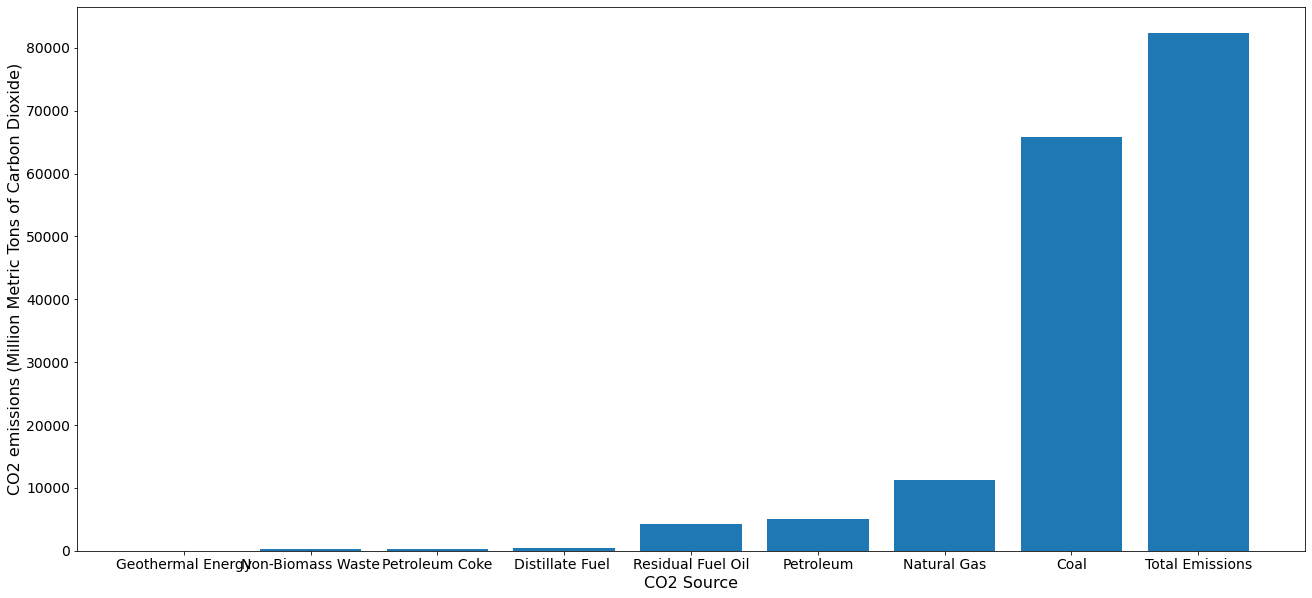

In [11]:
#Plot the bar chart in which we can visualize the main CO2 source 
plt.figure(figsize=(22,10))
plt.bar(cols, CO2_per_source)
plt.xlabel('CO2 Source', fontsize=16)
plt.ylabel('CO2 emissions (Million Metric Tons of Carbon Dioxide)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

The highest contributions of CO2 emissions generated in the evaluated period were made by coal, followed by natural gas and residual fuel. On the other hand, the lowest percentage was produced by geothermal energy sources with a value, which is not appreciated in the above graph

In [12]:
#For developing the time series model and forcasting, use the natural gas CO2 emission from the electirical power generation

Total_emissions_monthly = ts.iloc[:,1:]   # Monthly total emissions (mte)
ts_specif= ts.groupby(['Description', pd.Grouper(freq="M")])['Value'].sum().unstack(level = 0)
Natural_gas_emissions_monthly = ts_specif['Natural Gas Electric Power Sector CO2 Emissions'] # monthly total emissions (mte)
Natural_gas_emissions_monthly = Natural_gas_emissions_monthly.reset_index()
Natural_gas_emissions_monthly.columns = ['DATE', 'CO2 EMISSION VALUES (MMTons of CO2)']

Natural_gas_emissions_monthly['CO2 EMISSION VALUES (MMTons of CO2)'] = Natural_gas_emissions_monthly['CO2 EMISSION VALUES (MMTons of CO2)'].astype(float)

Natural_gas_emissions_monthly['DATE'] = pd.to_datetime(Natural_gas_emissions_monthly['DATE'])
Natural_gas_emissions_monthly = Natural_gas_emissions_monthly.set_index('DATE')

In [13]:
 #Check 1st few rows of data
Natural_gas_emissions_monthly.head()

,CO2 EMISSION VALUES (MMTons of CO2)
DATE,
1973-01-31,12.175
1973-02-28,11.708
1973-03-31,13.994
1973-04-30,14.627
1973-05-31,17.344


#### 2. Split the dataset

In order to create a dataset for making the Time Series Model, we split the data in 2 part: train and test dataset which have been selected by CO2 emissions from 1973-01-01 to 2014-07-31 in the train data and, from 2014-07-31 to 2016-07-31 in the test data.

In [14]:
# using first 41.7 years data as training data
train_data = Natural_gas_emissions_monthly.loc['1973-01-01':'2014-07-31']

# using the last 12 months data as test data
test_data = Natural_gas_emissions_monthly.loc['2014-07-31':]

print(train_data)
print(test_data)

            CO2 EMISSION VALUES (MMTons of CO2)
DATE                                           
1973-01-31                               12.175
1973-02-28                               11.708
1973-03-31                               13.994
1973-04-30                               14.627
1973-05-31                               17.344
...                                         ...
2014-03-31                               30.554
2014-04-30                               29.885
2014-05-31                               35.211
2014-06-30                               39.228
2014-07-31                               45.901

[499 rows x 1 columns]
            CO2 EMISSION VALUES (MMTons of CO2)
DATE                                           
2014-07-31                               45.901
2014-08-31                               48.871
2014-09-30                               41.961
2014-10-31                               38.286
2014-11-30                               32.703
2014-12-31      

### Now, let's visualise the train and test datatest through a graph

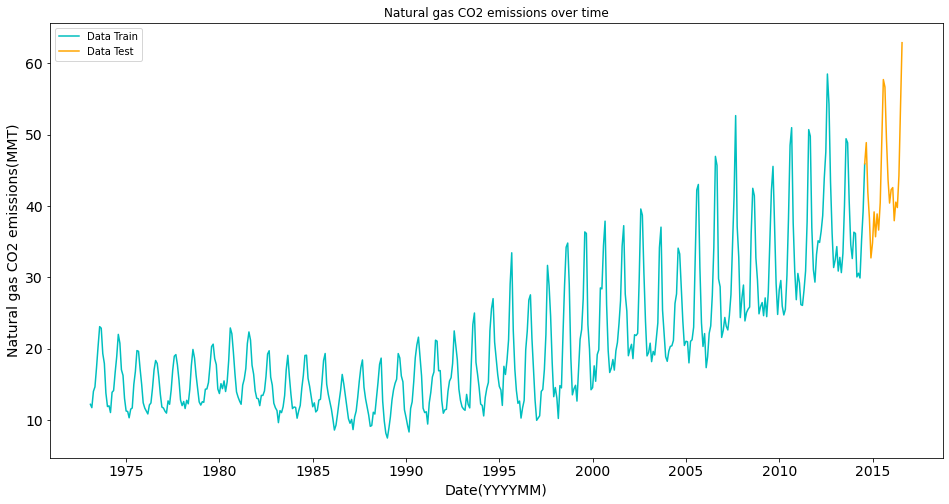

In [15]:
plt.figure(figsize=(16,8))
plt.plot(train_data, color='c', label='Data Train')
plt.plot(test_data, color='orange', label='Data Test')
plt.title('Natural gas CO2 emissions over time')
plt.xlabel('Date(YYYYMM)', fontsize=14)
plt.ylabel('Natural gas CO2 emissions(MMT)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()

## Test Stationarity

In [16]:
#Import the required package

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

### Test the stationarity through Visualisation

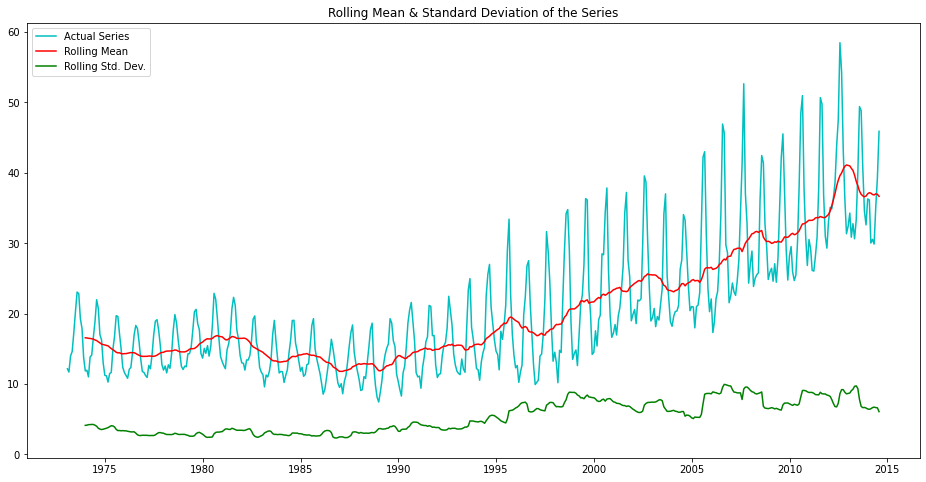

In [17]:
# Calculate the rolling mean and standard deviation for a window of 12 observations
rolmean=train_data.rolling(window=12).mean()
rolstd=train_data.rolling(window=12).std()

# Visualise the rolling mean and standard deviation
plt.figure(figsize=(16,8))
actual = plt.plot(train_data, color='c', label='Actual Series')
rollingmean = plt.plot(rolmean, color='red', label='Rolling Mean') 
rollingstd = plt.plot(rolstd, color='green', label='Rolling Std. Dev.')
plt.title('Rolling Mean & Standard Deviation of the Series')
plt.legend()
plt.show()

####  Observations and Insights: 
- From the graph above, we see that the mean tends to increase and that the standard deviation is a bit fluctuating so we could infer that the data are non-stationary. For these cases, it is best to support our hypotheses with the use of the Augmented Dickey-Fuller (ADF) Test.

### Test the stationarity using the Augmented Dickey-Fuller Test

Use the **Augmented Dickey-Fuller (ADF) Test** to verify if the series is stationary or not. The null and alternate hypotheses for the ADF Test are defined as:

**- Null hypothesis:** The Time Series is non-stationary


**- Alternative hypothesis:** The Time Series is stationary

In [18]:
#Define a function to use adfuller test
def adfuller(Natural_gas_emissions_monthly):
  #Importing adfuller using statsmodels
  from statsmodels.tsa.stattools import adfuller
  print('Dickey-Fuller Test: ')
  adftest = adfuller(Natural_gas_emissions_monthly) 
  adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Observations'])
  for key,value in adftest[4].items():
    adfoutput['Critical Value (%s)'%key] = value
  print(adfoutput)

adfuller(train_data)

Dickey-Fuller Test: 
Test Statistic            0.435097
p-value                   0.982761
Lags Used                15.000000
No. of Observations     483.000000
Critical Value (1%)      -3.443962
Critical Value (5%)      -2.867543
Critical Value (10%)     -2.569967
dtype: float64


#### Observations and Insights
- Taking into account that the result of p-value is higher than 0.05 (p=0.99), we fail to reject the null hypotesis. This means our time series is non-stationary. Therefore, our next step is converting our dataset into a stationary one.

### Transformation of the dataset into a stationary one

**We can use some of the following methods to convert a non-stationary series into a stationary one:**


1. Log Transformation
2. Differencing the series (lagged series)

We take the average of ‘k’ consecutive values depending on the frequency of time series (in this capstone 12 months). 

Here, we will take the average over the past 1 year.

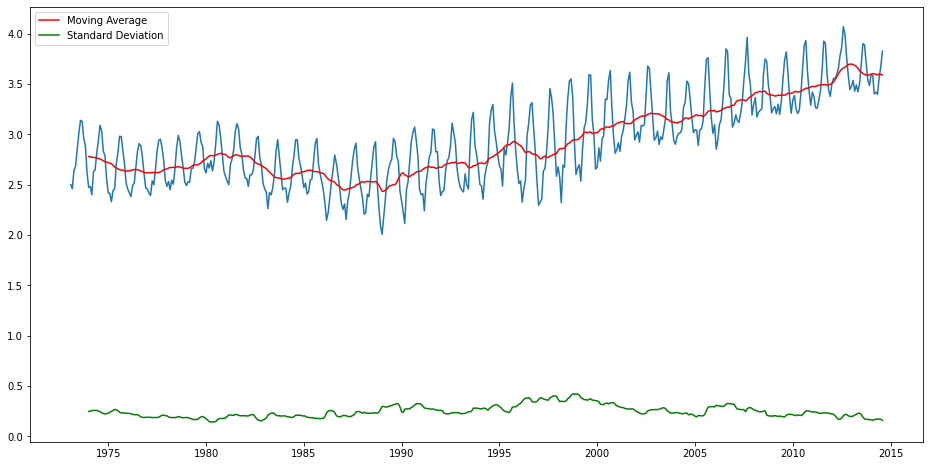

In [22]:
 # Visualise the rolling mean and standard deviation after using log transformation
plt.figure(figsize=(16,8))
train_log = np.log(train_data)
MAvg = train_log.rolling(window=12).mean()
MStd = train_log.rolling(window=12).std()
plt.plot(train_log)
plt.plot(MAvg, color='r', label = 'Moving Average')
plt.plot(MStd, color='g', label = 'Standard Deviation')
plt.legend()
plt.show()

**Observations and Insights:**
- Given that we can still see the upward trend in the series, we can conclude that the series is still non-stationary.
- It is relevant to point out that the standard deviation is almost constant, which implies that the series now has constant variance

**Visualise the rolling mean and rolling standard deviation of the shifted series (df_shift) and check the stationarity by calling the adfuller() function. Also, write your observations on the same.**

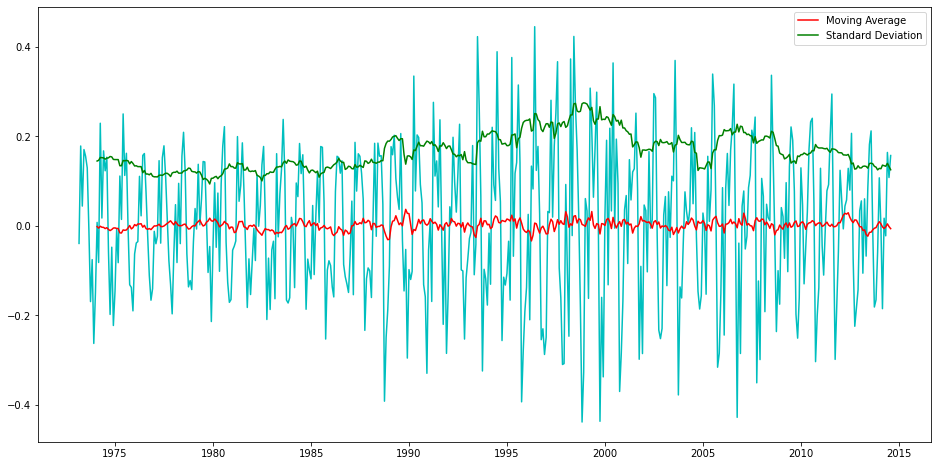

In [23]:
plt.figure(figsize=(16,8))
df_shift = train_log-train_log.shift(periods=1)
MAvg_shift = df_shift.rolling(window=12).mean()
MStd_shift = df_shift.rolling(window=12).std()
plt.plot(df_shift, color='c')
plt.plot(MAvg_shift, color='red', label = 'Moving Average')
plt.plot(MStd_shift, color='green', label = 'Standard Deviation')
plt.legend()
plt.show()

#Dropping the null values that we get after applying differencing method
df_shift = df_shift.dropna()

**Observations and Insights:**

In the graph above, we find that the mean and standard deviation tend to be constant over time

In [24]:
adfuller(df_shift)

Dickey-Fuller Test: 
Test Statistic           -4.951428
p-value                   0.000028
Lags Used                18.000000
No. of Observations     479.000000
Critical Value (1%)      -3.444076
Critical Value (5%)      -2.867593
Critical Value (10%)     -2.569994
dtype: float64


**Observations and Insights:**

At this point, we have converted our series to stationary since the **p-value is much smaller than 0.05**. Therefore, we reject the null hypothesis.

### Elimination of trend and seasonality: Decomposition

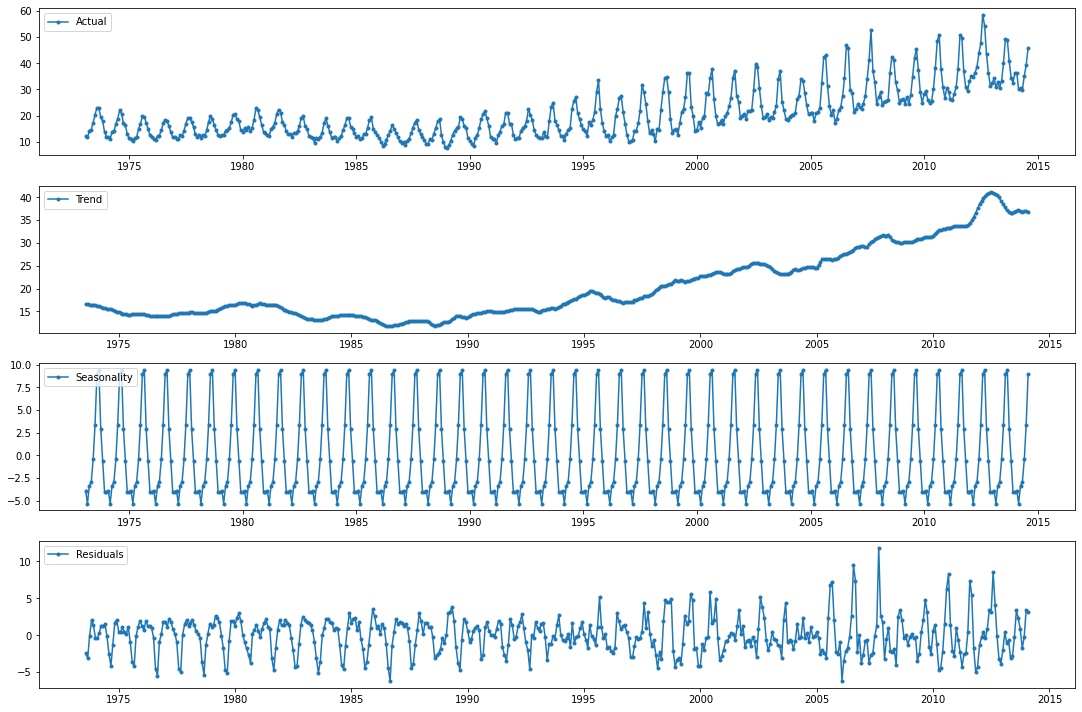

In [25]:
#Importing the seasonal_decompose function to decompose the time series

from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(train_data)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.figure(figsize=(15,10))
plt.subplot(411)
plt.plot(train_data, label='Actual', marker='.')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', marker='.')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', marker='.')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', marker='.')
plt.legend(loc='upper left')
plt.tight_layout()

**Observations and Insights:**

We can see that there are significant trend, seasonality and residuals components in the Natural gas CO2 emission series

**Plot the auto-correlation function and partial auto-correlation function to get p and q values for AR, MA, ARMA, and ARIMA models**

### Find optimal parameters (P, Q) and build the AR, MA, ARMA & ARIMA models

**Plot the ACF and PACF charts and find the optimal parameters**

<Figure size 1152x576 with 0 Axes>

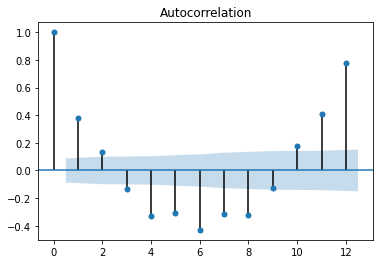

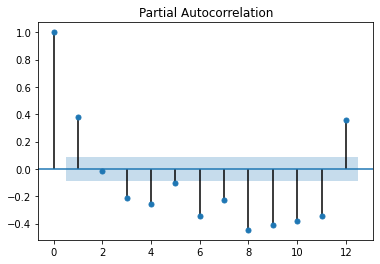

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plt.figure(figsize = (16,8))
plot_acf(df_shift, lags = 12) 
plt.show() 
plot_pacf(df_shift, lags = 12) 
plt.show()

**Observations and Insights:**

In the PACF plot shown above we see that the highest lag at which the plot extends beyond the statistically significant limit is lag 12, which indicates that an AR model of lag 12 **(p=12)** should be sufficient to fit the data. In the same way, from the ACF plot, we can deduce that **q=1**.

### AR MODEL

Order p is the lag value after which the PACF plot crosses the upper confidence interval for the first time. These p lags will act as our features while forecasting the AR time series.

Fit and predict the shifted series with the AR Model and calculate the RMSE. Also, visualize the time series and write your observations.

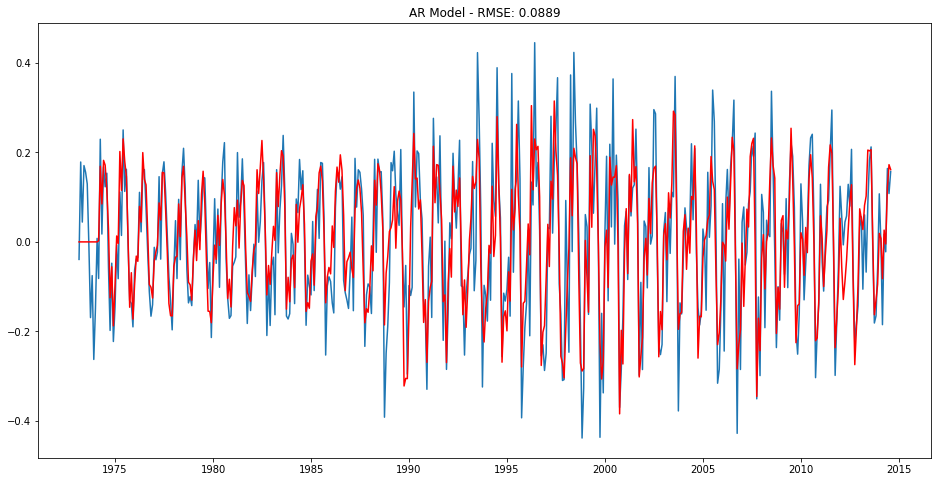

In [27]:
#Importing AutoReg function to apply AR model
from statsmodels.tsa.ar_model import AutoReg

plt.figure(figsize=(16,8))
model_AR = AutoReg(df_shift, lags=12) #Using number of lags as 12
results_AR = model_AR.fit()
plt.plot(df_shift)
predict = results_AR.predict(start=0,end=len(df_shift)-1)
predict = predict.fillna(0) #Converting NaN values to 0
plt.plot(predict, color='red')
plt.title('AR Model - RMSE: %.4f'% mean_squared_error(predict,df_shift, squared=False))  #Calculating rmse
plt.show()

**Observations & Insights:**
- We can see that with the use of the AR model we have achieved an RMSE value of 0.0866. 

### MA MODEL

Order q of the MA process is obtained from the ACF plot, this is the lag after which ACF crosses the upper confidence interval for the first time.

Fit and predict the shifted series with the MA Model and calculate the RMSE. Also, visualize the time series and write your observations.

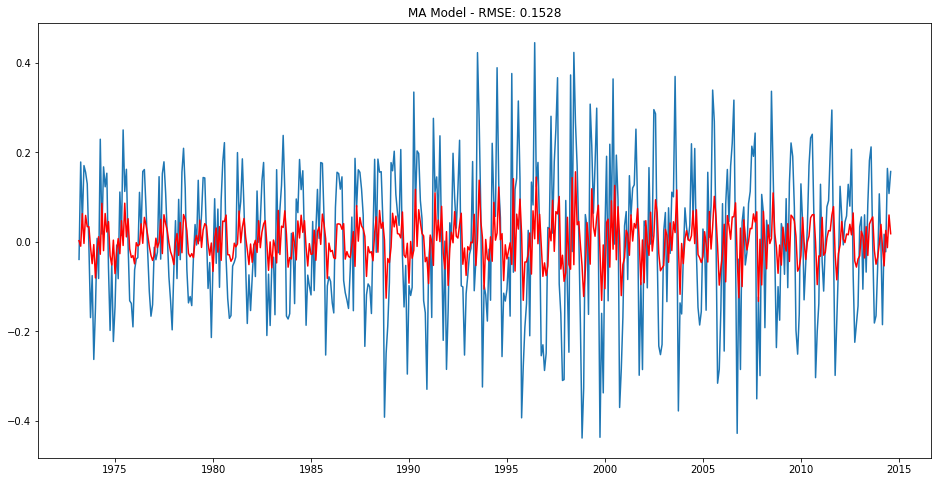

In [28]:
plt.figure(figsize=(16,8))
model_MA = ARIMA(df_shift, order=(0, 0, 1)) #Using p=0, d=0, q=1
results_MA = model_MA.fit()
plt.plot(df_shift)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('MA Model - RMSE: %.4f'% mean_squared_error(results_MA.fittedvalues,df_shift, squared=False))
plt.show()

**Observations & Insights:**

The MA model is giving higher RMSE value compared to the AR model.In addition, the graph shows that it fits the trend but not the fluctuations in the data.


Now, we will check the AIC value:

In [29]:
results_MA.aic

-451.871934699894

### ARMA MODEL

**We will be using the above AR lag(P) & MA lag(Q) as a paramter and d=0 in ARIMA so that it will work as an ARMA model.**

Fit and predict the shifted series with the ARMA Model and calculate the RMSE. Also, visualize the time series and write your observations.

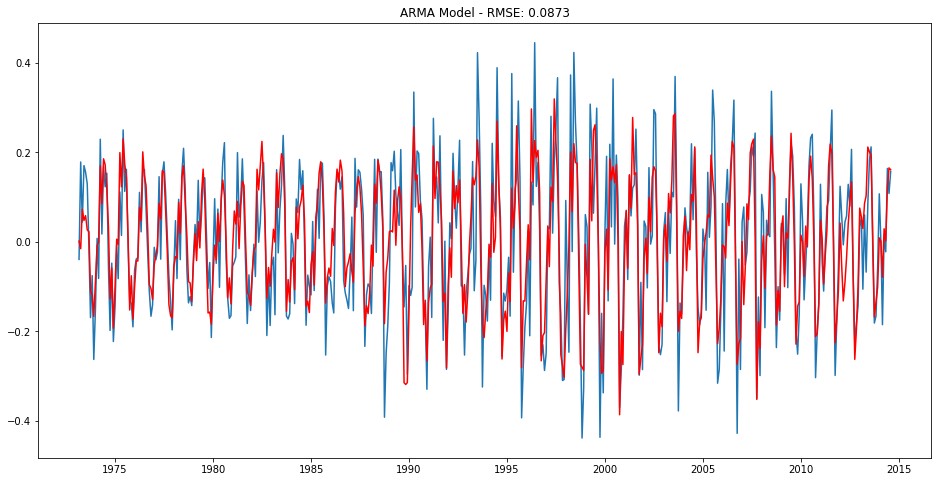

In [30]:
plt.figure(figsize=(16,8))
model_ARMA = ARIMA(df_shift, order=(12, 0, 1)) #Using p=12, d=0, q=1
results_ARMA = model_ARMA.fit()
plt.plot(df_shift)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('ARMA Model - RMSE: %.4f'% mean_squared_error(results_ARMA.fittedvalues,df_shift, squared=False))
plt.show()

**Observations & Insights:**

The ARMA model is giving simmilar RMSE values as compared to the AR and MA models.

### ARIMA MODEL

Fit and predict the shifted series with the ARIMA Model and calculate the RMSE. Also, visualize the time series and write your observations.

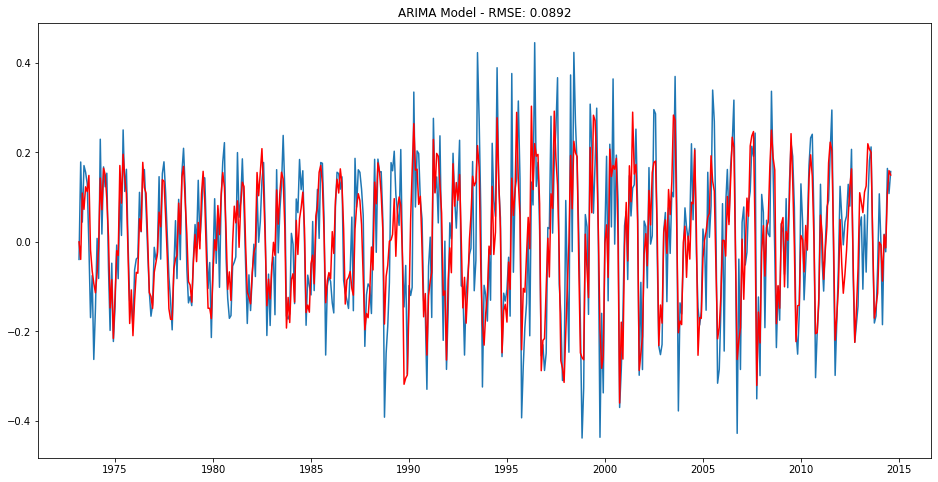

In [31]:
plt.figure(figsize=(16,8))
model_ARIMA = ARIMA(df_shift, order=(12, 1, 1)) #Using p=12, d=1, q=1
results_ARIMA = model_ARIMA.fit()
plt.plot(df_shift)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('ARIMA Model - RMSE: %.4f'% mean_squared_error(results_ARIMA.fittedvalues,df_shift, squared=False))
plt.show()

**Check the AIC value of the model**

In [32]:
results_ARIMA.aic

-963.2493658926337

In [33]:
df_shift_CO2_models={'RMSE':[mean_squared_error(predict,df_shift, squared=False),mean_squared_error(results_MA.fittedvalues,df_shift, squared=False), mean_squared_error(results_ARMA.fittedvalues,df_shift, squared=False),  mean_squared_error(results_ARIMA.fittedvalues,df_shift, squared=False)], 'AIC':[results_AR.aic, results_MA.aic, results_ARMA.aic, results_ARIMA.aic]}
df_shift_CO2_models= pd.DataFrame(df_shift_CO2_models, index= ['AR', 'MA', 'ARMA', 'ARIMA'])
df_shift_CO2_models

,RMSE,AIC
AR,0.088946,-4.817764
MA,0.152783,-451.871935
ARMA,0.087253,-983.786385
ARIMA,0.089160,-963.249366


**Observations and insights**

- The results between the ARMA and ARIMA models are very close in terms of RMSE and AIC. For the metric **AIC** in  AR and MA models, we obtain that these are higher than ARMA and ARIMA **AIC values** implying that the ARMA and ARIMA models fit better in the training data. 
- We can choose to predict the values using **ARIMA** as it takes into account more factors than AR, MA, ARMA models.

## Inverse Transformation

**Use the correct inverse transformation depending on the model chosen to get back the original values.**

Apply an inverse transformation on the predictions of the chosen model

In [34]:
predictions=pd.Series(results_ARIMA.fittedvalues)
predictions

DATE
1973-02-28    0.000000
1973-03-31   -0.039112
1973-04-30    0.108967
1973-05-31    0.072637
1973-06-30    0.122929
                ...   
2014-03-31    0.015696
2014-04-30   -0.013330
2014-05-31    0.110725
2014-06-30    0.159096
2014-07-31    0.149299
Length: 498, dtype: float64

In [35]:
#First step - doing cumulative sum
predictions_cumsum = predictions.cumsum()
predictions_cumsum

DATE
1973-02-28    0.000000
1973-03-31   -0.039112
1973-04-30    0.069855
1973-05-31    0.142492
1973-06-30    0.265421
                ...   
2014-03-31    0.986810
2014-04-30    0.973480
2014-05-31    1.084205
2014-06-30    1.243301
2014-07-31    1.392600
Length: 498, dtype: float64

In [36]:
#Second step - Adding the first value of the log series to the cumulative sum values
predictions_log = pd.Series(train_log['CO2 EMISSION VALUES (MMTons of CO2)'].iloc[0], index=train_log.index)
predictions_log = predictions_log.add(predictions_cumsum, fill_value=0)
predictions_log

DATE
1973-01-31    2.499385
1973-02-28    2.499385
1973-03-31    2.460272
1973-04-30    2.569239
1973-05-31    2.641876
                ...   
2014-03-31    3.486195
2014-04-30    3.472865
2014-05-31    3.583590
2014-06-30    3.742685
2014-07-31    3.891985
Length: 499, dtype: float64

In [37]:
#Third step - applying exponential transformation
predictions_ARIMA = np.exp(predictions_log)
predictions_ARIMA

DATE
1973-01-31    12.175000
1973-02-28    12.175000
1973-03-31    11.708000
1973-04-30    13.055891
1973-05-31    14.039524
                ...    
2014-03-31    32.661432
2014-04-30    32.228945
2014-05-31    36.002547
2014-06-30    42.211196
2014-07-31    49.008052
Length: 499, dtype: float64

**Plotting the original vs predicted series**

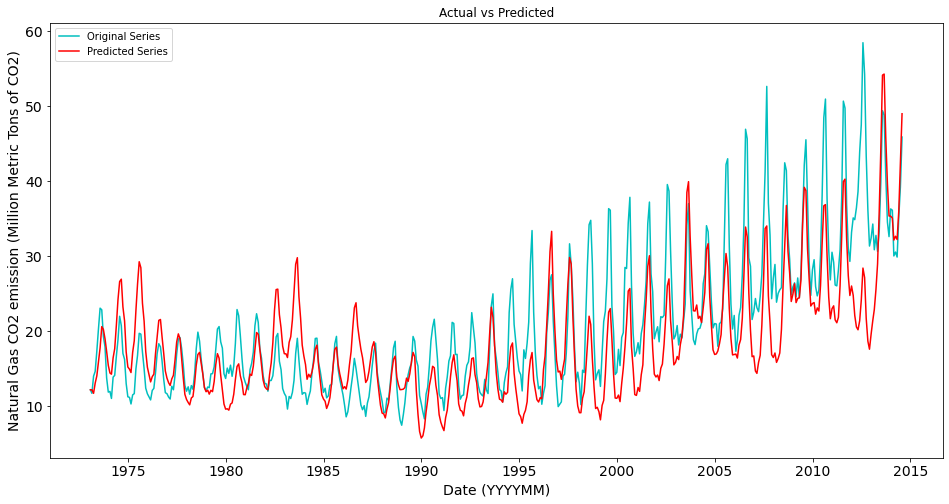

In [38]:
#Plotting the original vs predicted series
plt.figure(figsize=(16,8))
plt.plot(train_data, color = 'c', label = 'Original Series')
plt.plot(predictions_ARIMA, color = 'r', label = 'Predicted Series')
plt.title('Actual vs Predicted')
plt.legend()
plt.xlabel('Date (YYYYMM)', fontsize= 14)
plt.ylabel('Natural Gas CO2 emission (Million Metric Tons of CO2)', fontsize= 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**Observations & Insights:**

We can see that the model performs well on the training data in terms of the trend of them, however we can also notice that the fluctuations are slightly overestimated.


### Forecast the values for next 36 months and compare it with test data

Now, we are going to check how to perform the prediction on the test data (the last 24 months of the original data) and forecast the CO2 emissions for the next 12 months using the ARIMA model (12,1,1).

In [39]:
#Forecasting the values for next 36 months
forecasted_ARIMA = results_ARIMA.forecast(steps=36) # here steps represent the number of months
forecasted_ARIMA

2014-08-31    0.002957
2014-09-30   -0.149228
2014-10-31   -0.113792
2014-11-30   -0.064425
2014-12-31    0.049112
2015-01-31   -0.019069
2015-02-28   -0.114825
2015-03-31   -0.008526
2015-04-30    0.002191
2015-05-31    0.136996
2015-06-30    0.118494
2015-07-31    0.112463
2015-08-31    0.002891
2015-09-30   -0.118218
2015-10-31   -0.090671
2015-11-30   -0.063476
2015-12-31    0.011254
2016-01-31   -0.026271
2016-02-29   -0.078515
2016-03-31   -0.013119
2016-04-30    0.016893
2016-05-31    0.118181
2016-06-30    0.114540
2016-07-31    0.087563
2016-08-31    0.001626
2016-09-30   -0.093065
2016-10-31   -0.078108
2016-11-30   -0.061241
2016-12-31   -0.012466
2017-01-31   -0.030707
2017-02-28   -0.057642
2017-03-31   -0.010488
2017-04-30    0.026445
2017-05-31    0.103941
2017-06-30    0.105731
2017-07-31    0.072143
Freq: M, Name: predicted_mean, dtype: float64

In [40]:
#Creating a series of cumulative sum
forecasted_cumsum = forecasted_ARIMA.cumsum()
forecasted_cumsum

2014-08-31    0.002957
2014-09-30   -0.146270
2014-10-31   -0.260062
2014-11-30   -0.324488
2014-12-31   -0.275376
2015-01-31   -0.294445
2015-02-28   -0.409270
2015-03-31   -0.417796
2015-04-30   -0.415605
2015-05-31   -0.278610
2015-06-30   -0.160115
2015-07-31   -0.047652
2015-08-31   -0.044761
2015-09-30   -0.162979
2015-10-31   -0.253650
2015-11-30   -0.317126
2015-12-31   -0.305872
2016-01-31   -0.332143
2016-02-29   -0.410658
2016-03-31   -0.423778
2016-04-30   -0.406884
2016-05-31   -0.288703
2016-06-30   -0.174163
2016-07-31   -0.086600
2016-08-31   -0.084974
2016-09-30   -0.178039
2016-10-31   -0.256147
2016-11-30   -0.317388
2016-12-31   -0.329855
2017-01-31   -0.360562
2017-02-28   -0.418204
2017-03-31   -0.428693
2017-04-30   -0.402247
2017-05-31   -0.298306
2017-06-30   -0.192575
2017-07-31   -0.120431
Freq: M, Name: predicted_mean, dtype: float64

In [41]:
#Making a new dataframe to get the the indices from 2014-2017
index = pd.date_range('2014-08-31','2017-07-31' , freq='1M')
df1 = pd.DataFrame()
df1['cumsum'] = forecasted_cumsum
df1.index = index
df1

,cumsum
2014-08-31,0.002957
2014-09-30,-0.146270
2014-10-31,-0.260062
2014-11-30,-0.324488
2014-12-31,-0.275376
2015-01-31,-0.294445
2015-02-28,-0.409270
2015-03-31,-0.417796
2015-04-30,-0.415605
2015-05-31,-0.278610


In [42]:
#Adding last value of the log of the training data
df1['Forecasted'] = df1['cumsum'] + float(train_log.loc['2014-07-31'])
df1

,cumsum,Forecasted
2014-08-31,0.002957,3.829444
2014-09-30,-0.146270,3.680216
2014-10-31,-0.260062,3.566424
2014-11-30,-0.324488,3.501999
2014-12-31,-0.275376,3.551111
2015-01-31,-0.294445,3.532042
2015-02-28,-0.409270,3.417217
2015-03-31,-0.417796,3.408691
2015-04-30,-0.415605,3.410882
2015-05-31,-0.278610,3.547877


In [43]:
#Applying exponential transformation to the forecasted log values
forecasted_ARIMA = np.exp(df1['Forecasted'])
forecasted_ARIMA

2014-08-31    46.036943
2014-09-30    39.654975
2014-10-31    35.389830
2014-11-30    33.181718
2014-12-31    34.852008
2015-01-31    34.193711
2015-02-28    30.484449
2015-03-31    30.225649
2015-04-30    30.291942
2015-05-31    34.739501
2015-06-30    39.109743
2015-07-31    43.765029
2015-08-31    43.891747
2015-09-30    38.997920
2015-10-31    35.617495
2015-11-30    33.426898
2015-12-31    33.805199
2016-01-31    32.928672
2016-02-29    30.442160
2016-03-31    30.045389
2016-04-30    30.557271
2016-05-31    34.390614
2016-06-30    38.564174
2016-07-31    42.093222
2016-08-31    42.161717
2016-09-30    38.414979
2016-10-31    35.528666
2016-11-30    33.418128
2016-12-31    33.004107
2017-01-31    32.006044
2017-02-28    30.213312
2017-03-31    29.898082
2017-04-30    30.699299
2017-05-31    34.061943
2017-06-30    37.860642
2017-07-31    40.692973
Freq: M, Name: Forecasted, dtype: float64

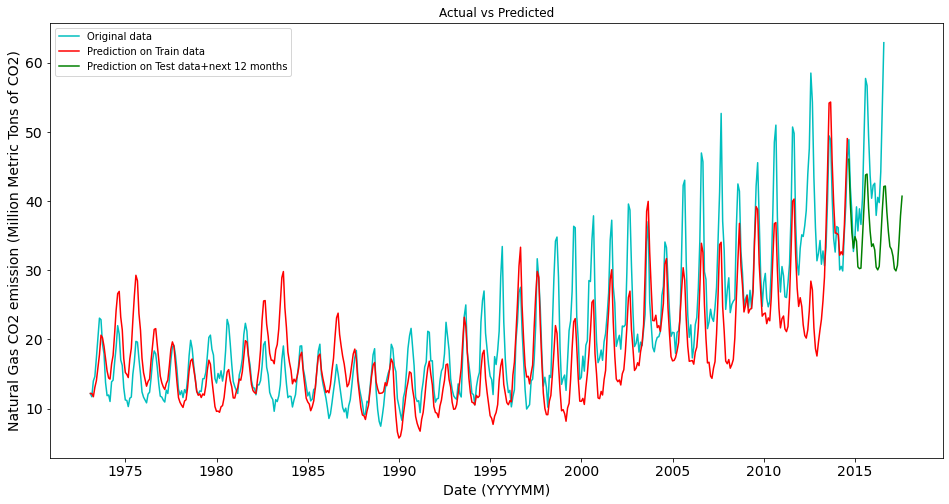

In [44]:
plt.figure(figsize=(16,8))
plt.plot(Natural_gas_emissions_monthly, color = 'c', label = 'Original data')
plt.plot(predictions_ARIMA, color = 'r', label = 'Prediction on Train data')
plt.plot(forecasted_ARIMA, label = 'Prediction on Test data+next 12 months', color='green')
plt.title('Actual vs Predicted')
plt.legend()
plt.xlabel('Date (YYYYMM)', fontsize= 14)
plt.ylabel('Natural Gas CO2 emission (Million Metric Tons of CO2)', fontsize= 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**Check the RMSE on the original train and test data and write your conclusion from the above analysis.**

In [45]:
RMSE_train = mean_squared_error(predictions_ARIMA, train_data, squared = False)
RMSE_train

6.076403732109061

In [46]:
RMSE_test = mean_squared_error(forecasted_ARIMA['2014-08-31': '2016-07-31'], test_data['2014-08-01': '2016-07-31'], squared = False)
RMSE_test

9.274748757620989

**Observations**

- Considering that for the RMSE low values indicate better performance, we see that this response variable is a bit lower in the test data than the one obtained in the train data.
- This implies that the predictions on the training data are closer to the actual values as compared to the testing data. The above might be because there have been some fluctuations in the CO2 emission during the training timeline that perhaps the model was not able to take into account. Remember that this point has also been noticed earlier.

#### Think about it:

**Can we use other than RMSE measurement to check the performance of the model?**

**Mean Absolute Error(MAE)** could also be used for this purpose. It is necessary to mention that MAE is defined as the average of the absolute difference between forecasted and actual values. For MAE, lower values represent better performance.

Now, let's check the results of this metric:

In [47]:
from sklearn.metrics import mean_absolute_error


#Now, we are going to calculate the Mean Absolute Error (MAE) 
train_MAE = mean_absolute_error(predictions_ARIMA, train_data)
print('MAE in train data:', train_MAE)

test_MAE = mean_absolute_error(forecasted_ARIMA['2014-08-31': '2016-07-31'], test_data['2014-08-31': '2016-07-31'])
print('MAE in test data:', test_MAE)


MAE in train data: 4.606900690917324
MAE in test data: 8.008049729517197


Summarising the evaluated metrics in the following table:

In [48]:
performance_tsmodel={'RMSE':[RMSE_train, RMSE_test], 'MAE':[train_MAE, test_MAE]}
performance_tsmodel= pd.DataFrame(performance_tsmodel, index= ['Train Data', 'Test Data'])
performance_tsmodel

,RMSE,MAE
Train Data,6.076404,4.606901
Test Data,9.274749,8.008050


## Proposed Approach in the modelling process
**Refined insights:**
- we have done the data cleaning and visualisation, as well as delimited our work on the construction of the time series for carbon dioxide emissions generated by the use of natural gas as an energy source 
- It was necessary to perform a logarithmic and df_shift transformation to convert the series from non-stationary to stationary.
- Through the plots of the auto-correlation function(ACF) and partial auto-correlation Function (PACF) charts, we found the optimal p and q parameters.
- In order to reach our objetive, we explored different modelling techniques such as: AR,MA,ARMA and ARIMA and evaluating which model fit better to the data considering significant difference of the selected metric.
- We have chosen the ARIMA model to forecast the CO2 emissions.

**Comparison of various techniques and their relative performance:**

Throughout the notebook, we have explored and analysed the performance of different time series modelling techniques such as AR, MA, ARMA and ARIMA. These models were initially evaluated on the training data by plotting the predictions against the actual data and further we used the RMSE and AIC as metrics to select the best model but results were closer each ARMA and ARIMA. To continue with our process of predicting CO2 emissions with the use of natural gas, we selected the ARIMA model.


**What model do you propose to be adopted? Why is this the best solution to adopt?** 
As it was mentioned earlier, the ARIMA model (12, 1, 1) performs well on the dataset in terms of the trend of them, however we can also notice that the fluctuations are no completely well-adjusted. Considering that, the Seasonal Autoregressive Integrated Moving-Average (SARIMA) would be able to improve these tiny point. SARIMA Model combines the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level (regarding the information reviewed: https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/).

#### Additional point: Evaluation the performance of SARIMA Model 

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [51]:
model_SARIMA = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
         
results_SARIMA = model_SARIMA.fit()
results_SARIMA 

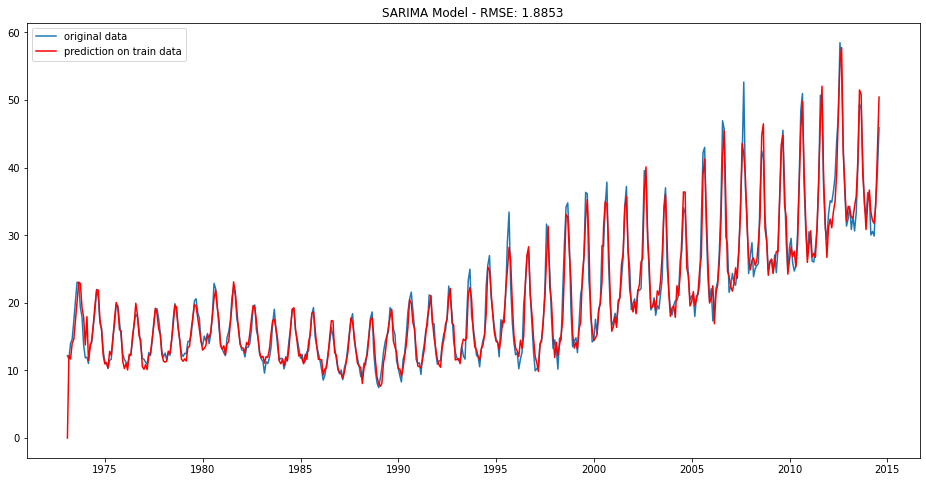

In [64]:
plt.figure(figsize=(16,8))
plt.plot(train_data, label= 'original data')
plt.plot(results_SARIMA.fittedvalues, color='red', label='prediction on train data')
plt.legend()
plt.title('SARIMA Model - RMSE: %.4f'% mean_squared_error(results_SARIMA.fittedvalues,train_data, squared=False))
plt.show()

In [57]:
results_SARIMA.aic

1954.2894524536384

**Observation:**
- We can see that SARIMA model performs much better than other models evaluated.

## MEASUREMENTS TO IMPLEMENT FOR THE REDUCTION OF CO2 EMISSIONS

### Recommendations for Implementation

As was mentioned earlier, the highest contributions of CO2 emissions generated in the evaluated period were made by coal, followed by natural gas and residual fuel. This is why it is best to migrate to other types of energy or to continue improving CO2 capture processes in order to use it as raw material and avoid its release into the atmosphere. The following are some of the strategies that could be implemented to achieve this purpose:

- **REFORESTATION**: It is the most widely used method worldwide in which plants absorb or capture carbon dioxide from the air as raw material and through the process of photosynthesis transform it into oxygen that is expelled into the environment. Among their additional advantages,  habitat is generated for species, diversity of plant material in the areas and the culture of promotion and the promotion of environment protection. This method requires long periods of time to appreciate significant effects.


- **ENVIRONMENTAL MANAGEMENT SYSTEM:** It is a system that allows organizations to ensure compliance and to promote the reduction of environmental aspects and impacts generated by the activities they develop and thus promote conferences and campaigns for reducing the carbon footprint. The environmental management system is verifiable and applicable at the international level, which allows organizations to diversify on the applicable controls for reaching the environmental objectives.

- **HYDROGEN**: Energy efficiency and fuel substitution will make it easier to integrate other sectors into the energy transition and achieve the gradual decarbonisation of the economy. For example, green hydrogen, obtained from renewable sources through electrolysis, and low-carbon or blue hydrogen, generated from fossil fuels (mainly coal and natural gas with carbon capture), are set to play a significant role in this process. Blue hydrogen can also be obtained from natural gas. Through incomplete combustion, the carbon released from this process is captured and stored, substantially reducing emissions.

- **MICROALGAE PRODUCTION**. Microalgae can take CO2 and transform it into high-value products, thereby reducing emissions into the atmosphere and obtaining an additional benefit. As a relevant points to highlight:A recent report from Utah State University in the US estimates that microalgae cultivation can produce 50 times more fuel per unit area than soybean cultivation and these installations can be carried out on land not suitable for agriculture, which is quite favorable.

- **ARTIFICIAL PHOTOSYNTHESIS**: Aims to simulate the natural process of the plant, based on capturing carbon dioxide and thus using it for the production of oxygen. This initiative is based on a micro-reactor equipped with LED lights that illuminate a chemically modified diamond photocatalyst.

References: 
Agencia Internacional de Energía (AIE), The role of gas, 2019.
Agencia Internacional de Energía (AIE), https://www.iea.org/data-and-statistics, Data and Statistics, 2021.
https://www.bbvaopenmind.com/ciencia/medioambiente/dos-maneras-de-convertir-el-co2-de-gas-invernadero-materia-prima/
https://www.greenfacts.org/es/captura-almacenamiento-co2/l-2/3-captura-co2.htm#0
https://www.bbc.com/mundo/noticias-56531777.amp

